<a href="https://colab.research.google.com/github/blizanac76/Reinforcement-Learning/blob/main/Copy_of_MazeRL_ZadaciDOmaci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from abc import ABC, abstractmethod
from typing import Iterable
from copy import copy

import numpy as np
import matplotlib.pyplot as plt

from random import random
import random

In [3]:
class Cell(ABC):

    @abstractmethod
    def get_reward(self) -> float:
        pass

    def is_steppable(self) -> bool:
        return True

    def is_terminal(self) -> bool:
        return False

    def has_value(self) -> bool:
        return True

In [4]:
class RegularCell(Cell):

    def __init__(self, reward: float):
        self.reward = reward

    def get_reward(self) -> float:
        return self.reward


class TerminalCell(Cell):

    def __init__(self, reward: float):
        self.reward = reward

    def get_reward(self) -> float:
        return self.reward

    def is_terminal(self) -> bool:
        return True

    def has_value(self) -> bool:
        return False


class WallCell(Cell):

    def get_reward(self) -> float:
        return 0

    def is_steppable(self) -> bool:
        return False

    def has_value(self) -> bool:
        return False

class TeleportCell(Cell):

    def __init__(self, reward: float):
        self.reward = reward
    def get_reward(self) -> float:
        return 0
    def is_steppable(self) -> bool:
        return True
    def has_value(self) -> bool:
        return False




In [58]:
class Board:



    @staticmethod
    #process_cells uzima matricu POLJA
    #obrada polja i formiranje liste lista klasa POLJE
    def process_cells(cells: list[list[Cell]]):
        cells = [list(row) for row in cells] if cells else []
        if not cells:
            raise Exception("Number of rows in a board must be at least one.")
        if not cells[0]:
            raise Exception("There has to be at least one column.")
        rows_no = len(cells)
        cols_no = len(cells[0])
        for row in cells:
            if not row or len(row) != cols_no:
                raise Exception(
                    "Each row in a a board must have the same number of columns. ")
        return rows_no, cols_no, cells

  #provera da li je pozicija dobra
    def process_pos(self, pos):
        r, c = pos
        if r < 0 or r >= self.rows_no:
            raise Exception("Invalid row position.")
        if c < 0 or c >= self.cols_no:
            raise Exception("Invalid column position.")
        if not cells[r][c].is_steppable():
            raise Exception("Invalid position: unsteppable cell.")
        return r, c

  #konstruktor uzima polje kao board i poziciju
  #uzima dimenzija table, strukturu polja
  #priprema tablu sa incijalnim poljem
    def __init__(self, cells: Iterable[Iterable[Cell]], pos: tuple[int, int]):
        rows_no, cols_no, cells = Board.process_cells(cells)
        self.cells = cells
        self.rows_no = rows_no
        self.cols_no = cols_no
        r, c = self.process_pos(pos)
        self.row = r
        self.col = c

  #indeksiranje preko koordiata matrice/Liste Lista (table)
    def __getitem__(self, key: tuple[int, int]) -> Cell:
        r, c = key
        return self.cells[r][c]

  #update pozicije, nova pozicija
    def set_position(self, pos):
        r, c = self.process_pos(pos)
        self.row = r
        self.col = c

  #trenutna ozicija
    def current(self):
        return self[self.row, self.col]

  #pomeranje
    def move_up(self):
        if self.row != 0 and \
           self[self.row-1, self.col].is_steppable():
            self.row = self.row-1

    def move_down(self):
        if self.row != self.rows_no-1 and \
           self[self.row+1, self.col].is_steppable():
            self.row = self.row+1

    def move_left(self):
        if self.col != 0 and \
           self[self.row, self.col-1].is_steppable():
            self.col = self.col-1

    def move_right(self):
        if self.col != self.cols_no-1 and \
           self[self.row, self.col+1].is_steppable():
            self.col = self.col+1

  #numeracija pokreta

    def move(self, direction):
        RIGHT = 0
        UP = 1
        LEFT = 2
        DOWN = 3
        if direction == 0 or direction == RIGHT:
            self.move_right()
        elif direction == 1 or direction == UP:
            self.move_up()
        elif direction == 2 or direction == LEFT:
            self.move_left()
        elif direction == 3 or direction == DOWN:
            self.move_down()
        else:
            raise Exception("Invalid direction.")

    def get_actions(self):
        return [0, 1, 2, 3]

  #pravi listu svih polja koja su dostupna za kretanje
    def get_states(self):
        states = []
        for r in range(self.rows_no):
            for c in range(self.cols_no):
                if self[r, c].is_steppable():
                    states.append((r, c))
        return states



In [59]:
#kod za svako polje preko kojih mapiramo matricu
def int_to_cell(code: int) -> Cell:
    if code == 0:
        return RegularCell(-1)
    elif code == 1:
        return RegularCell(-10)
    elif code == 2:
        return WallCell()
    elif code == 3:
        return TerminalCell(-1)
    elif code == 4:
        return TeleportCell(-1)

In [60]:
#generisanje matrice polja, nasumicno, 8x8, sa verovatnocama za svako polje. prv
#i broj je broj polja, dimenzije i sanse za svako polje da se stvori
cell_codes = np.random.choice(5, size=(8, 8), p=[0.6, 0.1, 0.1, 0.1, 0.1])
print(cell_codes)

[[0 0 1 3 1 0 3 0]
 [0 0 3 3 0 0 0 0]
 [1 1 1 3 0 0 0 1]
 [0 0 0 0 0 1 0 0]
 [0 0 4 0 3 0 1 2]
 [0 4 0 1 0 0 0 1]
 [1 0 4 1 0 0 0 4]
 [1 0 0 0 2 0 0 3]]


In [61]:
#vizualizacija matrice od gore
#crtanje RGB formatom
#board img pravi 3d vektore za svaku RGB boju
def draw_board(board: Board, draw_pos=True):
    board_img = np.ones(shape=(board.rows_no, board.cols_no, 3), dtype=np.uint8)
    for i in range(board.rows_no):
        for j in range(board.cols_no):
            if isinstance(board[i, j], RegularCell):
                if board[i, j].get_reward() == -1:
                    board_img[i, j, :] = [255, 255, 255] # Regular cell BELO
                else: #CRVENO
                    board_img[i, j, :] = [255, 0, 0] # Regular cell with penalty
            elif isinstance(board[i, j], WallCell): #CRNO
                board_img[i, j, :] = [0, 0, 0] # Wall cell
            elif isinstance(board[i, j], TeleportCell):#ZELENO
                board_img[i, j, :] = [0, 100, 0] #Teleport Cell
            else:#PLAVO
                board_img[i, j, :] = [0, 0, 255] # Terminal cell
    #board_img[board.row, board.col, :] = [255, 255, 0]
    plt.imshow(board_img, )
    if draw_pos:
        plt.text(board.col-0.1, board.row+0.1, "X", fontweight="bold")

In [62]:
cells = [[int_to_cell(cell_codes[i, j]) for i in range(cell_codes.shape[0])] for j in range(cell_codes.shape[1])]

In [63]:
board = Board(cells, (0, 0))

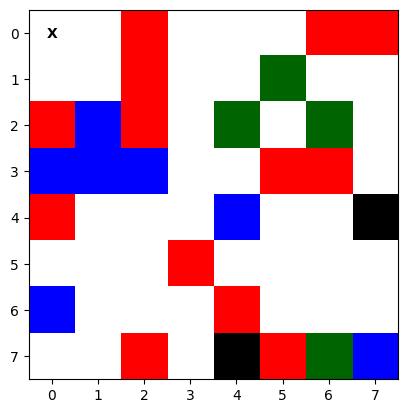

In [64]:
draw_board(board)

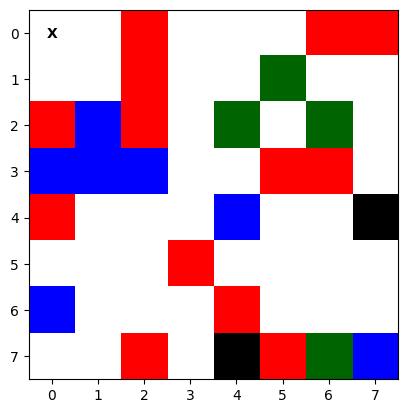

In [65]:
draw_board(board)

In [66]:
board.move(0)

#3 DOLE
#1 gore
#2 levo
#0 desno


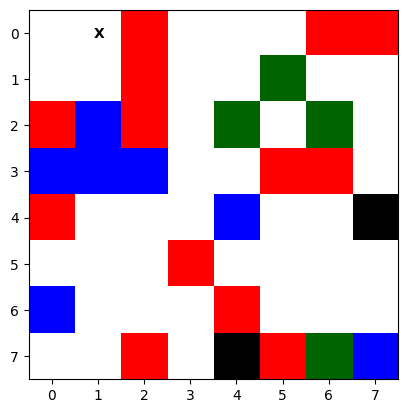

In [67]:
draw_board(board)

#teleportuje na nasumicno polje, unutar table koje je dostupno kao pozicija
#DOMACI 1.1
Xc, Yc = board.row, board.col

if isinstance(board.current(), TeleportCell):
    print("detektujem teleport polje")

    # nova pozicija u opsegu dimenzija table
    new_position = (random.randint(0, board.rows_no - 1), random.randint(0, board.cols_no - 1))

    #random polje mora biti steppable ako nije nadji novo
    while not board[new_position].is_steppable():
        new_position = (random.randint(0, board.rows_no - 1), random.randint(0, board.cols_no - 1))

    print(f"idem na polje::::: {new_position}")
    board.set_position(new_position)

Dodavanje optimalne vrednosti stanja:


In [68]:
#DOMACI 1.2
#racunanje V vrednosti
#koriscena je obicna formula v(s) = h(s,a) + KorektivniFaktor*v(s+)
#funkcija run_value_iteration ide kroz svako stanje (polje) u Boardu i racuna mu V
#pre toga su V vrednosti po defaultu, 0 za sve
#V ne mora biti recnik, moze i niz jer znamo dimenziju boarda
#faktor zaboravljanja je 0.9 a zaustavljanje kada se max v ne menja ni za 0.00001

#uraditi za q
class VVrednost:
    def __init__(self, board, gamma=0.9, epsilon=0.00001):
        self.board = board
        self.gamma = gamma
        self.epsilon = epsilon

    def find_v_vrednost(self):
        V = {}
        #V = []
        for state in self.board.get_states():
            V[state] = 0

        while True:
            delta = 0
            for state in self.board.get_states():
                v = V[state]
                max_value = -9999 #default neki, moze bilo sta -999999999999
                for action in range(4):  #za svako moguce kretanje izmi V vrednost
                    self.board.set_position(state) #trenutno se pozocionira na taj state da bi isao gore dole levo desno
                    self.board.move(action)
                    next_state = self.board.row, self.board.col
                    reward = self.board[next_state].get_reward()
                    value = reward + self.gamma * V[next_state]
                    max_value = max(max_value, value)

                V[state] = max_value
                delta = max(delta, abs(v - V[state]))

            if delta < self.epsilon:
                break

        return V



In [69]:
#ponovno crtanje table, istim principom kao gore samo sto saljem i V vrednosti
#koje sam izracunao prethodno
def draw_board_v(board: Board, draw_pos=True, state_values=None):
    board_img = np.ones(shape=(board.rows_no, board.cols_no, 3), dtype=np.uint8)
    for i in range(board.rows_no):
        for j in range(board.cols_no):
            if isinstance(board[i, j], RegularCell):
                if board[i, j].get_reward() == -1:
                    board_img[i, j, :] = [255, 255, 255]
                else:
                    board_img[i, j, :] = [255, 0, 0]
            elif isinstance(board[i, j], WallCell):
                board_img[i, j, :] = [0, 0, 0]
            elif isinstance(board[i, j], TeleportCell):
                board_img[i, j, :] = [0, 100, 0]
            else:
                board_img[i, j, :] = [0, 0, 255]

    plt.imshow(board_img)
    if draw_pos:
        plt.text(board.col - 0.1, board.row + 0.1, "X", fontweight="bold")

    #dodavanje v vrednosti za svaki cell
    #if state_values:
    #if state_values is True
    if state_values is not None:
        for state, value in state_values.items():
            i, j = state  # i i j kao kordinate, kljuc koji povezuje v i board
            plt.text(j, i, f'{value:.2f}', ha='center', va='center', fontsize=12, color='black')

    plt.show()




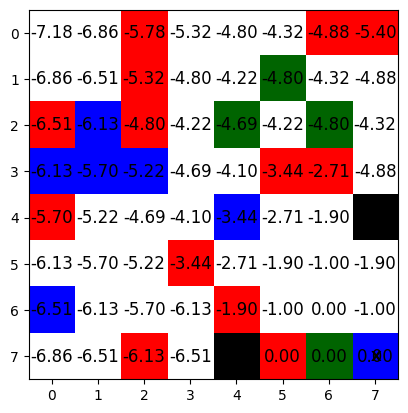

In [70]:
v_v = VVrednost(board)
V_values = v_v.find_v_vrednost()
draw_board_v(board, state_values=V_values)

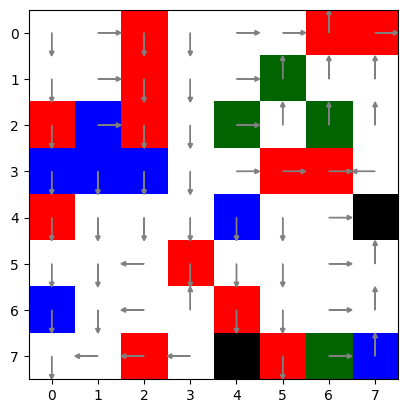

In [71]:
#domaci 1.3 ne radi
class VVrednost2:
    def __init__(self, board, gamma=0.9, epsilon=0.00001):
        self.board = board
        self.gamma = gamma
        self.epsilon = epsilon

    def run_value_iteration_to_terminal(self):
        V = {}
        for state in self.board.get_states():
            V[state] = 0

        while True:
            delta = 0
            for state in self.board.get_states():
                v = V[state]
                max_value = float('-inf')
                for action in range(4):
                    self.board.set_position(state)
                    self.board.move(action)
                    next_state = self.board.row, self.board.col
                    reward = self.board[next_state].get_reward()
                    value = reward + self.gamma * V[next_state]

                    max_value = max(max_value, value)

                V[state] = max_value
                delta = max(delta, abs(v - V[state]))

            if delta < self.epsilon:
                break

        return V

    def policy_to_terminal(self, V_values):
        policy = {}
        for state in self.board.get_states():
            max_value = float('-inf')
            best_action = None
            for action in range(4):
                self.board.set_position(state)
                self.board.move(action)
                next_state = self.board.row, self.board.col
                reward = self.board[next_state].get_reward()
                value = reward + self.gamma * V_values[next_state]

                if value > max_value:
                    max_value = value
                    best_action = action

            policy[state] = best_action

        return policy

    def visualize_policy_arrows(self, policy):
        board_img = np.ones(shape=(self.board.rows_no, self.board.cols_no, 3), dtype=np.uint8)
        for i in range(self.board.rows_no):
            for j in range(self.board.cols_no):
                if isinstance(self.board[i, j], RegularCell):
                    if self.board[i, j].get_reward() == -1:
                        board_img[i, j, :] = [255, 255, 255]  # Regular cell WHITE
                    else:
                        board_img[i, j, :] = [255, 0, 0]  # Regular cell  pena RED
                elif isinstance(self.board[i, j], WallCell):
                    board_img[i, j, :] = [0, 0, 0]  # Wall cell BLACK
                elif isinstance(self.board[i, j], TeleportCell):
                    board_img[i, j, :] = [0, 100, 0]  # Teleport cell GREEN
                else:
                    board_img[i, j, :] = [0, 0, 255]  # Terminal cell BLUE

        plt.imshow(board_img)
        for state, action in policy.items():
            i, j = state
            dx, dy = 0, 0
            if action == 0:
                dy = 1
            elif action == 1:
                dx = -1
            elif action == 2:
                dy = -1
            elif action == 3:
                dx = 1

            plt.arrow(j, i, dx * 0.4, dy * 0.4, head_width=0.1, head_length=0.1, fc='grey', ec='grey')

        plt.show()

vvrednost2 = VVrednost2(board)
V_values2 = vvrednost2.run_value_iteration_to_terminal()
optimal_policy = vvrednost2.policy_to_terminal(V_values2)
vvrednost2.visualize_policy_arrows(optimal_policy)

#WALL CRNO
#TELEPORT ZELENO
#TERMINAL PLAVO

From (0, 0) to (0, 1) : >
From (0, 1) to (1, 1) : v
From (1, 1) to (2, 1) : v
